In [119]:
import drawSvg as draw
import random
import math

In [187]:
xMax= 250
yMax = 250
max_radius=150
min_radius=3

In [188]:
class Circle:
    def __init__(self, x,y,r):
        self.x = x
        self.y = y
        self.r = r
    
    def toSvg(self):
        return draw.Circle(self.x,self.y,self.r, stroke_width=1,stroke='black', fill='none')

In [189]:
def randomX():
    return random.randrange(-1*xMax,xMax)
def randomY():
    return random.randrange(-1*yMax,yMax)

In [190]:
def maxRadius(circles, x, y):
    r = max_radius
    r = min([r, xMax-abs(x),yMax-abs(y)])
    for c in circles:
        dist = math.dist((x,y),(c.x,c.y))
        r = min(dist - c.r, r)
        if r < 0:
            return -1
    return r

In [191]:
def maybeAddCircle(circles):
    x = randomX()
    y = randomY()
    r = maxRadius(circles, x, y)
    if r > min_radius:
        circles.append(Circle(x,y,r))

In [192]:
maybeAddCircle(circles)

In [193]:
len(circles)

1045

In [194]:
circles = []
for i in range(10000):
    maybeAddCircle(circles)

In [195]:
len(circles)

501

In [196]:
d = draw.Drawing(xMax*2, yMax*2, origin='center')
for c in circles:
    d.append(c.toSvg())

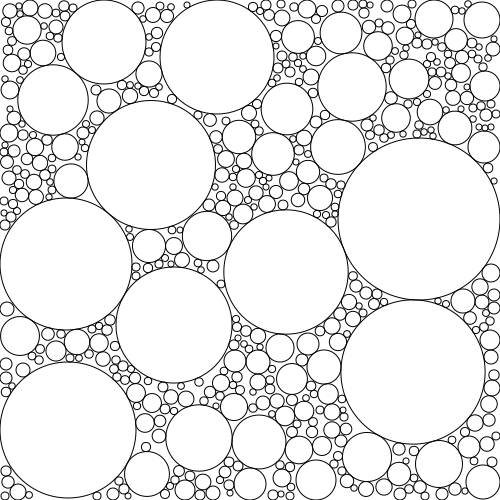

In [197]:
# Display in Jupyter notebook
d.rasterize()  # Display as PNG
d  # Display as SVG

In [178]:
d.saveSvg('packed.svg')